<img src="cyberlabs..jpg" style="width:300px;height:300px"/>

<img src="ml_logo.png" style="width:300px;height:300px"/>

<img src="woc_logo-fullsize.png" style="width:200px;height:200px"/>

#  ML Essentials

# Exploratory Data Analysis (EDA)

*  Importing  libraries

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

* Loading the data set

In [101]:
data=pd.read_csv('kmeans_dataset.csv')     #defining a variable named as data for loaded dataset

 * Basic data exploration

In [102]:
data.head                           #by deafault head function will give the 5 records each from top and bottom of dataset

<bound method NDFrame.head of       Hardwork     Skills   Label
0     1.483358   6.135020  C Tier
1    52.864104  48.897037  B Tier
2    67.556683  19.359183  D Tier
3    52.797684  43.650076  B Tier
4    45.060080  74.978268  B Tier
..         ...        ...     ...
455  48.414533  53.807818  B Tier
456  49.534222  54.425778  B Tier
457  30.457458  40.396009  B Tier
458   2.277720   5.085407  C Tier
459  37.012233  51.093717  B Tier

[460 rows x 3 columns]>

In [103]:
data.shape                                 #shape function gives the number of rows and columns present in dataset

(460, 3)

In [104]:
data.info()                                #info function gives breif information about loaded dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Hardwork  460 non-null    float64
 1   Skills    460 non-null    float64
 2   Label     460 non-null    object 
dtypes: float64(2), object(1)
memory usage: 10.9+ KB


In [105]:
data.isnull().sum()                        #veifying if data contains any missing values

Hardwork    0
Skills      0
Label       0
dtype: int64

In [106]:
data.describe()  #describe function shows different aspects of data such as minimum,maximum,mean and different percentile values

,Hardwork,Skills
count,460.000000,460.000000
mean,47.019178,38.439590
std,24.895360,26.136017
min,0.712341,1.447058
25%,25.287181,13.987334
50%,48.519039,38.515372
75%,67.467031,60.161463
max,97.618528,95.704652


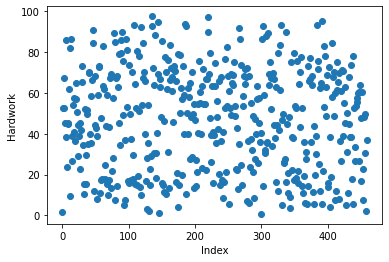

In [107]:
plt.scatter(data.index,data['Hardwork'])     #plotting scatter-plot representing Hardwork against index or observation No.
plt.xlabel('Index')
plt.ylabel("Hardwork")
plt.show()

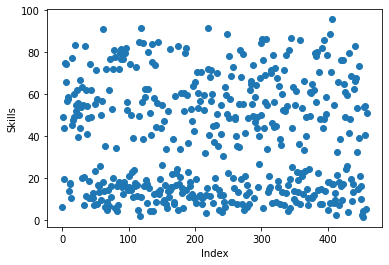

In [108]:
plt.scatter(data.index,data['Skills'])          #plotting scatter-plot representing Skills against index or observation No.
plt.xlabel('Index')
plt.ylabel("Skills")
plt.show()

Text(0, 0.5, 'Frequency')

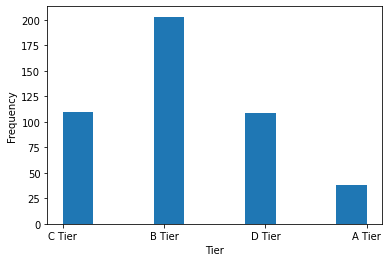

In [109]:
plt.hist(data['Label'])                           #plotting histogram for tier against its frequency
plt.xlabel('Tier')
plt.ylabel("Frequency")

* Handling Outliers       (outliers are observations which are very far from other data)


<AxesSubplot:>

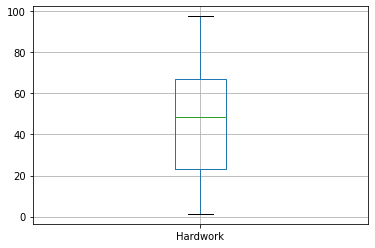

In [136]:
data.boxplot("Hardwork")      #verifying if data contains outliers by plotting boxplot (conclusion:NO outliers is present)

<AxesSubplot:>

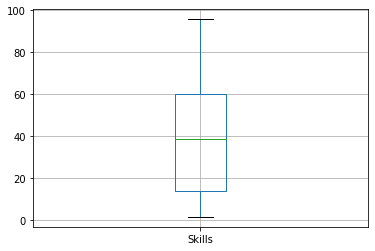

In [111]:
data.boxplot("Skills")                   #(conclusion: NO outliers are present)

* Normalizing and Scaling

In [2]:
# The variables of the data set are of same scales therefore data normalization is not required here

 * Univariate Analysis

In [112]:
data_A=data.loc[data['Label']=='A Tier']              #defining variables particularly for observations belonging to each Tier 
data_B=data.loc[data['Label']=='B Tier']              #   using .loc function
data_C=data.loc[data['Label']=='C Tier']
data_D=data.loc[data['Label']=='D Tier']

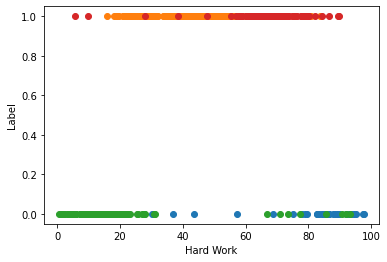

In [113]:
plt.scatter(data_A['Hardwork'],np.zeros_like(data_A['Hardwork']),label='Tier A')
plt.scatter(data_B['Hardwork'], np.ones_like(data_B['Hardwork']),label='Tier B')   #Color    Tier
plt.scatter(data_C['Hardwork'],np.zeros_like(data_C['Hardwork']),label='Tier C')   #Blue      A
plt.scatter(data_D['Hardwork'], np.ones_like(data_D['Hardwork']),label='Tier D')   #Orange    B
plt.xlabel('Hard Work')                                                            #Green     C
plt.ylabel('Label')                                                                #Red       D
plt.show()                                                                  #Plotting Scatterplot univariate(Hardwork) Analysis

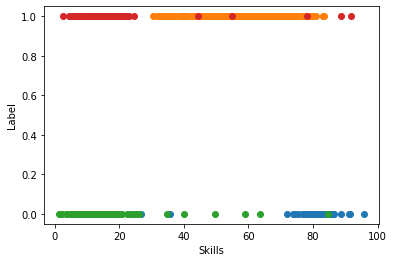

In [114]:
plt.scatter(data_A['Skills'],np.zeros_like(data_A['Skills']),label='Tier A')#Plotting Scatterplot univariate(Skills) Analysis
plt.scatter(data_B['Skills'], np.ones_like(data_B['Skills']),label='Tier B')           
plt.scatter(data_C['Skills'],np.zeros_like(data_C['Skills']),label='Tier C')           
plt.scatter(data_D['Skills'], np.ones_like(data_D['Skills']),label='Tier D')          
plt.xlabel('Skills')                                                      
plt.ylabel('Label')                                                     
plt.show()      

* Bivariate Analysis

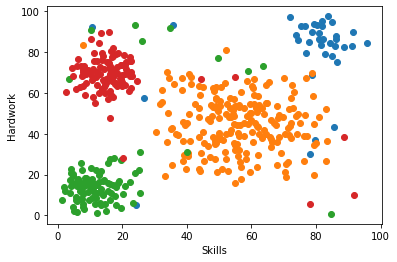

In [115]:
plt.scatter(data_A['Skills'],data_A['Hardwork'],label='Tier A')    #plotting scatter-plot representing Hardwork against Skills
plt.scatter(data_B['Skills'],data_B['Hardwork'],label='Tier B')
plt.scatter(data_C['Skills'],data_C['Hardwork'],label='Tier C')
plt.scatter(data_D['Skills'],data_D['Hardwork'],label='Tier D')
plt.xlabel('Skills')
plt.ylabel('Hardwork')
plt.show()

<img src="hardwork.jpg" style="width:200px;height:200px"/>

# K-Means Clustering

* Train Test Split

In [116]:
from sklearn.model_selection import train_test_split #splitting the dataset using sklearn,(60:20:20) as training,validation,test

data, data_test = train_test_split(data,test_size=0.2,train_size=0.8)
data_train, data_valid = train_test_split(data,test_size = 0.25,train_size =0.75)

In [117]:
data_train.head

<bound method NDFrame.head of       Hardwork     Skills   Label
54   59.000937  16.592349  D Tier
427  62.962990  48.911030  B Tier
392  95.205348  81.912527  A Tier
453  22.623823   4.288589  C Tier
338  89.872428  78.673286  A Tier
..         ...        ...     ...
39   35.098665  48.657445  B Tier
64   24.867728  35.371319  B Tier
24   44.503135  39.595512  B Tier
400  13.695618  18.122097  C Tier
232  35.369218  45.298613  B Tier

[276 rows x 3 columns]>

In [118]:
data_test.head

<bound method NDFrame.head of       Hardwork     Skills   Label
277  67.924454  11.873769  D Tier
101  15.797210  15.721221  C Tier
112  14.803757  11.518968  C Tier
391   5.342187   7.830898  C Tier
242   8.723537  11.821286  C Tier
..         ...        ...     ...
7    23.826756  56.802663  B Tier
443  53.461534  67.800083  B Tier
321  37.894186  72.425093  B Tier
26   45.296165  66.873110  B Tier
279  72.121733  16.482607  D Tier

[92 rows x 3 columns]>

In [119]:
data_valid.head

<bound method NDFrame.head of       Hardwork     Skills   Label
57   11.010126  25.607435  C Tier
124  65.870732  58.684559  B Tier
102  49.521172  74.407246  B Tier
378  11.647646  11.192476  C Tier
47   84.307034  12.911185  D Tier
..         ...        ...     ...
312  63.958129  14.720111  D Tier
340  20.569530   4.155890  C Tier
161  13.464391  10.770659  C Tier
122  84.274551  84.399103  A Tier
172  16.438624  22.281333  C Tier

[92 rows x 3 columns]>

* Applying algorithm 

In [120]:
from sklearn.cluster import KMeans
%matplotlib inline

In [121]:
sse = []                                                      #validation by sum of squared error method
for k in range(1,10):
    km = KMeans(n_clusters=k)
    km.fit(data_valid[['Skills','Hardwork']])
    sse.append(km.inertia_)

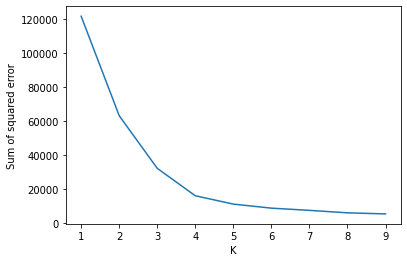

In [122]:
plt.xlabel('K')                                               #Plotting elbow plot for depicting the numbers of clusters
plt.ylabel('Sum of squared error')                            #conclusion - number of clusters should be 4
plt.plot(range(1,10),sse)

In [123]:
km = KMeans(n_clusters=4)                                                 #declaring the number of clusters

In [124]:
km.fit(data_train[['Skills','Hardwork']],data_train['Label'])             #fitting  the data or training our model

KMeans(n_clusters=4)

In [125]:
km.cluster_centers_                                                    #shows the cartesian coordinates of centeroid of clusters

array([[75.41692791, 77.21732623],
       [57.5780509 , 41.45818985],
       [11.78083767, 13.58429689],
       [16.68208328, 69.54631944]])

* Testing

In [126]:
data_predict=km.predict(data_test[['Skills','Hardwork']])                  #predicting labels for testing dataset

In [127]:
data_predict.shape

(92,)

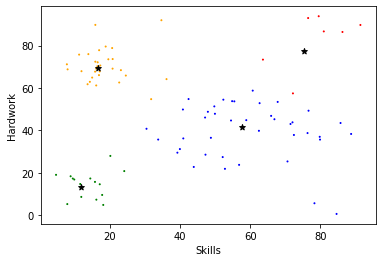

In [128]:
plt.scatter(data_test['Skills'],data_test['Hardwork'],data_predict==0,color='red')    #plotting scatterplot for testing dataset
plt.scatter(data_test['Skills'],data_test['Hardwork'],data_predict==1,color='blue')
plt.scatter(data_test['Skills'],data_test['Hardwork'],data_predict==2,color='green')
plt.scatter(data_test['Skills'],data_test['Hardwork'],data_predict==3,color='orange')
plt.xlabel('Skills')
plt.ylabel('Hardwork')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*')
plt.show()

In [142]:
from sklearn.preprocessing import LabelEncoder 
l1 = LabelEncoder()                     #Label encoding as string type label cannot be compared with int type predicted cluster
l1.fit(data_test['Label'])
data_test.Label = l1.transform(data_test.Label)
data_test

c:\users\brijesh\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Hardwork,Skills,Label
277,67.924454,11.873769,3
101,15.797210,15.721221,2
112,14.803757,11.518968,2
391,5.342187,7.830898,2
242,8.723537,11.821286,2
...,...,...,...
7,23.826756,56.802663,1
443,53.461534,67.800083,1
321,37.894186,72.425093,1
26,45.296165,66.873110,1


In [141]:
from sklearn import metrics                                           #Testing accuracies
score = metrics.accuracy_score(data_test['Label'],data_predict)
score

0.8695652173913043

# THE END